In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# MNIST comes with 60000 images with w and h of 28 pxs
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

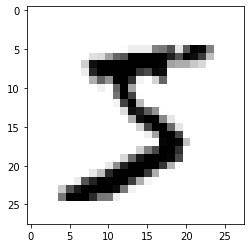

In [7]:
plt.imshow(single_image,cmap='gray_r')

In [9]:
# Converting labels to HOT-ONE, e.g. where 2 is 001 (so that CNN does not confuse data as a regression problem)
# Otherwise, might look for intermediate values instead of defining them as distinct categories

In [10]:
from keras.utils.np_utils import to_categorical

In [12]:
# We have 10 classes (0 - 9 digits)
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [15]:
# At first index of dataset we had 5, so new value should be 000005
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
# Normalizing original image values to values between 0 and 1 
x_train = x_train / x_train.max()

In [17]:
x_test = x_test / x_test.max()

In [20]:
scaled_image = x_train[0]

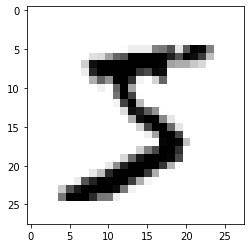

In [21]:
# Checking that data is okay
plt.imshow(scaled_image,cmap='gray_r')

In [22]:
# Reshaping data to mimic how the model would operate if image had various color channels 
x_train = x_train.reshape(60000,28,28,1)

In [23]:
x_test = x_test.reshape(10000,28,28,1)

In [24]:
# Building model
from keras.models import Sequential

In [25]:
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten

In [29]:
model = Sequential()

# Start creating convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

# Adding pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Transform results of pooling layer to something that the outer layer can understand (by flattening it to a 1D array)
model.add(Flatten())

# Final dense layer
model.add(Dense(128, activation='relu'))

# Output layer (classifier) that directly outputs what it thinks it is 
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Training model
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 35s 581us/step - loss: 0.1375 - acc: 0.9583
Epoch 2/2
60000/60000 [==============================] - 33s 548us/step - loss: 0.0495 - acc: 0.9856


In [32]:
# Testing model
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 196us/step


[0.03973994367059204, 0.9869]

In [33]:
# Predict
from sklearn.metrics import classification_report

In [34]:
predictions = model.predict_classes(x_test)

In [35]:
# the predictions returned outputs corresponding to classifiers (5 for 5 and so one, not in HOT ONE normalization)
# This is why we used original labels to compare performance of model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      1.00      1.00      1135
          2       0.98      0.99      0.99      1032
          3       0.98      1.00      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.98      0.99      0.98       892
          6       0.99      0.97      0.98       958
          7       0.98      0.99      0.98      1028
          8       0.99      0.98      0.98       974
          9       0.99      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000

